<a href="https://colab.research.google.com/github/tadongguk98/Learn_flask_python/blob/master/Homework_Mixture_of_Gaussians_modeling_for_Color_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Description of the Problem :
The objective is to determine, for a given set of data or image, the ideal number of clusters (in this case, Gaussian mixtures or dominant colors). Each color in a picture can be thought of as a point in a three-dimensional space (RGB). Finding groupings of colors that are similar to one another is known as clustering these points, and doing so can help reduce the amount of colors in an image while maintaining its visual integrity.

#2. The Method
Bayesian Information Criterion (BIC)



A criterion called BIC is used to choose a model from a limited number of options. It is especially helpful in the context of model selection with unsupervised learning and is based on the likelihood function. The BIC formula is:

\text{BIC} = k \cdot \ln(n) - 2 \cdot \ln(\hat{L})



Where:

L' is the maximized value of the likelihood function of the model,

k is the number of parameters to be estimated,

n is the number of observations.

Gaussian Mixture Models (GMM)

Assuming that every data point is produced by a combination of a finite number of Gaussian distributions with unknown parameters, GMMs are a probabilistic model. They serve to reveal the fundamental parameters.'

In [24]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import matplotlib.pyplot as plt
from skimage import io


In [25]:
# Load the classic image from scikit-learn datasets
image = io.imread("House_inthe_AutumnForest.png")
image = np.array(image, dtype=np.float64) / 255

# Convert the 3D image to a 1D array of pixel values
w, h, d = original_shape = tuple(image.shape)
image_array = np.reshape(image, (w * h, d))

In [26]:
def compute_bic(kmeans, X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit-learn

    X     :  multidimensional input data, shape = (n_samples, n_features)

    Returns:
    -----------------------------------------
    bic   :  Bic value for the given cluster centers
    """
    # Assign cluster labels
    labels = kmeans.labels_

    # Number of clusters
    m = kmeans.n_clusters

    # Size of the data
    n = np.shape(X)[0]

    # Size of dimensions
    d = np.shape(X)[1]

    # Compute the BIC
    sigma = np.sum((X - kmeans.cluster_centers_[labels]) ** 2) / (n - m)
    bic = n * np.log(sigma) + m * d * np.log(n)

    return bic

In [27]:
# Range of number of clusters to try
range_n_clusters = range(2, 5)

# Initialise the BIC scores
bic_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize and fit the KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    kmeans.fit(image_array)

    # Compute the BIC score
    bic_score = compute_bic(kmeans, image_array)
    bic_scores.append(bic_score)

# Find the optimal number of clusters based on the minimum BIC score
optimal_n_clusters = range_n_clusters[np.argmin(bic_scores)]
print(f"The optimal number of colors based on BIC is {optimal_n_clusters}")

The optimal number of colors based on BIC is 4


In [28]:
# Initialize and fit the KMeans clustering model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(image_array)

# Get the cluster labels for each pixel
labels = kmeans.labels_

# Get the cluster centers (colors)
colors = kmeans.cluster_centers_

# Reshape the labeled pixels back to the original image shape
image_labels = np.reshape(labels, original_shape[:2])

# Create the color-reduced image
color_reduced_image = colors[labels]
color_reduced_image = np.reshape(color_reduced_image, original_shape)

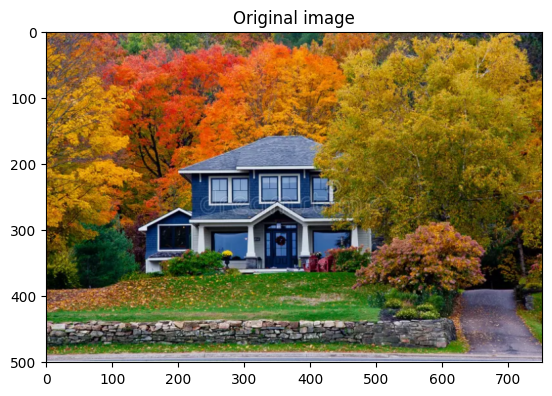

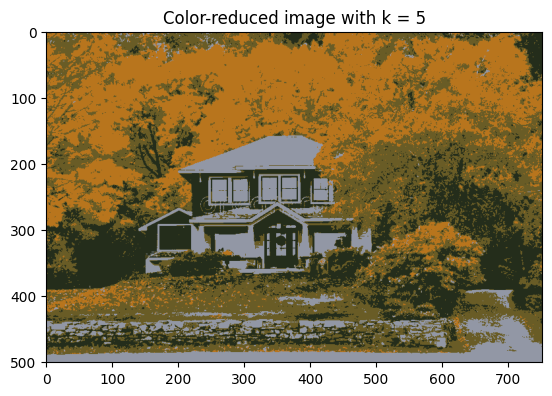

In [29]:

plt.imshow(image)
plt.title(f"Original image")
plt.show()
# Display the color-reduced image
plt.imshow(color_reduced_image)
plt.title(f"Color-reduced image with k = 5")
plt.show()

The optimal number of colors based on BIC is 9


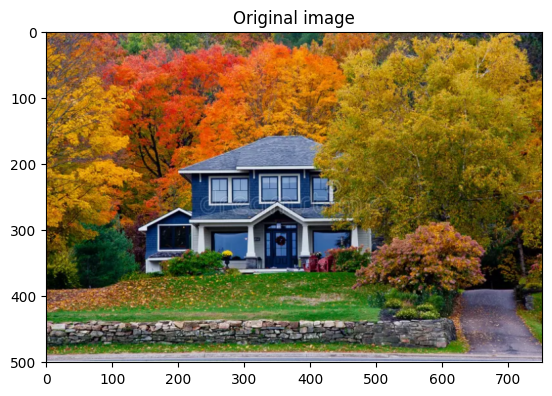

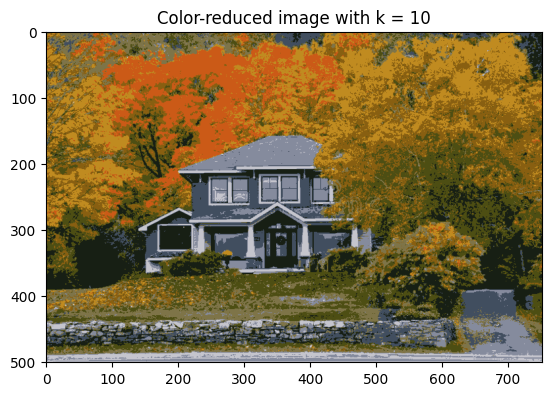

In [30]:
# Range of number of clusters to try
range_n_clusters = range(5, 10)

# Initialise the BIC scores
bic_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize and fit the KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    kmeans.fit(image_array)

    # Compute the BIC score
    bic_score = compute_bic(kmeans, image_array)
    bic_scores.append(bic_score)

# Find the optimal number of clusters based on the minimum BIC score
optimal_n_clusters = range_n_clusters[np.argmin(bic_scores)]
print(f"The optimal number of colors based on BIC is {optimal_n_clusters}")
# Initialize and fit the KMeans clustering model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(image_array)

# Get the cluster labels for each pixel
labels = kmeans.labels_

# Get the cluster centers (colors)
colors = kmeans.cluster_centers_

# Reshape the labeled pixels back to the original image shape
image_labels = np.reshape(labels, original_shape[:2])

# Create the color-reduced image
color_reduced_image = colors[labels]
color_reduced_image = np.reshape(color_reduced_image, original_shape)
plt.imshow(image)
plt.title(f"Original image")
plt.show()
# Display the color-reduced image
plt.imshow(color_reduced_image)
plt.title(f"Color-reduced image with k = 10")
plt.show()

The optimal number of colors based on BIC is 19


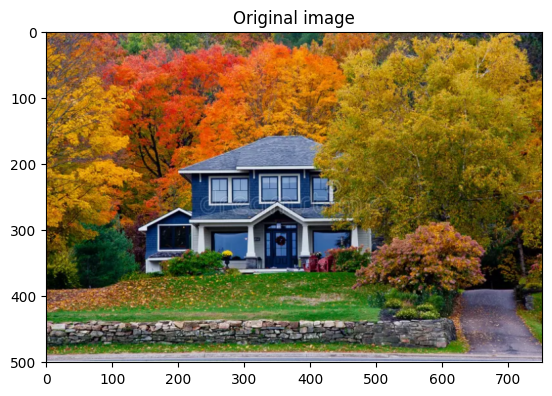

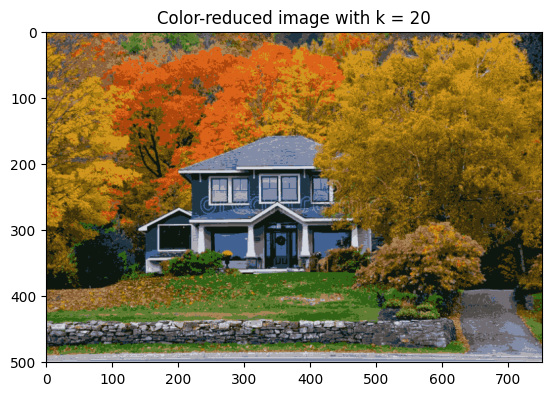

In [31]:
# Range of number of clusters to try
range_n_clusters = range(10, 20)

# Initialise the BIC scores
bic_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize and fit the KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    kmeans.fit(image_array)

    # Compute the BIC score
    bic_score = compute_bic(kmeans, image_array)
    bic_scores.append(bic_score)

# Find the optimal number of clusters based on the minimum BIC score
optimal_n_clusters = range_n_clusters[np.argmin(bic_scores)]
print(f"The optimal number of colors based on BIC is {optimal_n_clusters}")
# Initialize and fit the KMeans clustering model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(image_array)

# Get the cluster labels for each pixel
labels = kmeans.labels_

# Get the cluster centers (colors)
colors = kmeans.cluster_centers_

# Reshape the labeled pixels back to the original image shape
image_labels = np.reshape(labels, original_shape[:2])

# Create the color-reduced image
color_reduced_image = colors[labels]
color_reduced_image = np.reshape(color_reduced_image, original_shape)
plt.imshow(image)
plt.title(f"Original image")
plt.show()
# Display the color-reduced image
plt.imshow(color_reduced_image)
plt.title(f"Color-reduced image with k = 20")
plt.show()